### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import visuals as vs
from mpl_toolkits.mplot3d import axes3d

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree

from xgboost import XGBClassifier

% matplotlib inline

# Set Random Seed
np.random.seed(42)
np.random.RandomState(42)

### Importing Data

In [10]:
# Read csv
data = pd.read_csv("data.csv")
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


### Analyzing Data

In [7]:
print("Number of data points :", len(data))

Number of data points : 569


In [9]:
#shape command give no.of rows and no.of columns
data.shape

(569, 33)

In [4]:
# Describe data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# print columns
data.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Preparing Data

In [7]:
# Save labels in y
y = data["diagnosis"]

### Selecting Features

We don't need pacient "id", "diagnosis" is our labels and "Unnamed: 32" have only NaNs. Let exclude this tree columns.

In [8]:
# Drop columns
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

### Looking for correlation between features

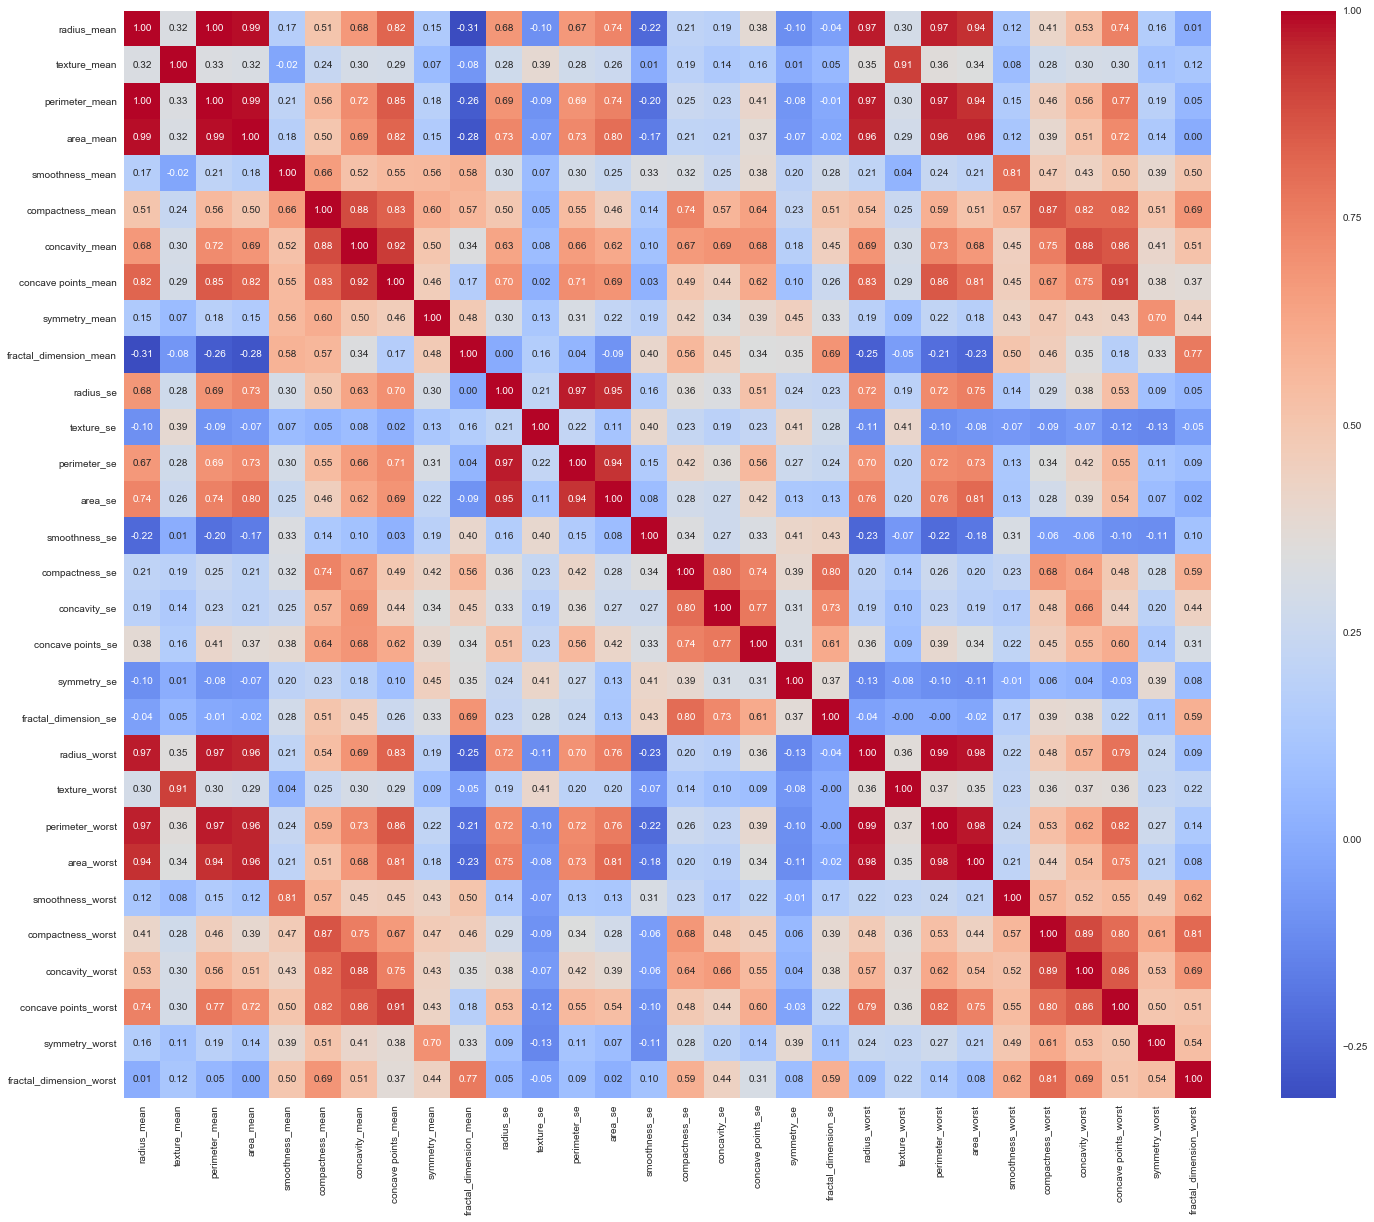

In [9]:
# Plot a Correlation chart
corr = X.corr() # .corr is used for find corelation
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(25,20)})
# plot a heatmap
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'coolwarm') 

### **There is some stronge correlations: **

Features like (something)_mean, (something)_se, (something)_worst, have a natural correlation because all these are generated using same data, for example: to generate radius_mean, radius_se and radius_worst, radius mesuraments is used. 


### Positive Correlation:

Radius, Perimeter and Area have stronge positive correlation

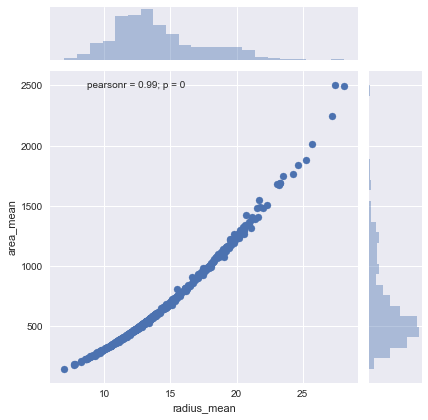

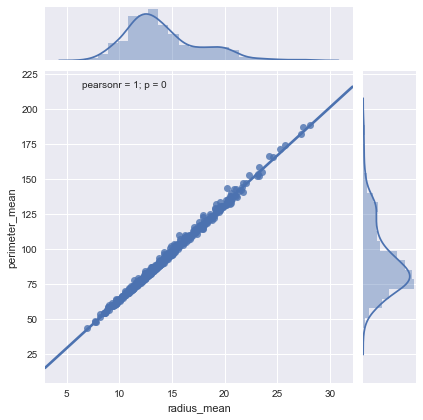

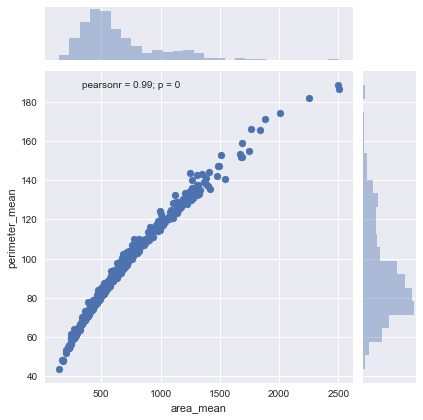

In [10]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'area_mean'], 
              kind="scatter")

sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'area_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="scatter")

Radius have a strong positive correlation with Concave Points

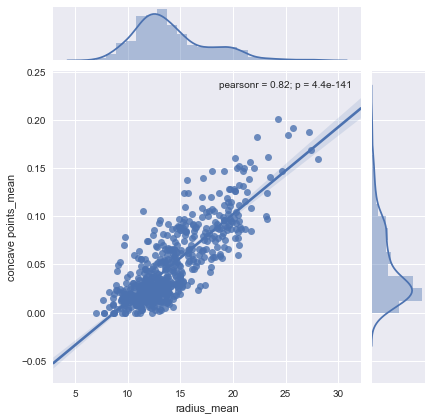

In [11]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")

Compacteness, Concavity and Concave Points have strong positive correlation

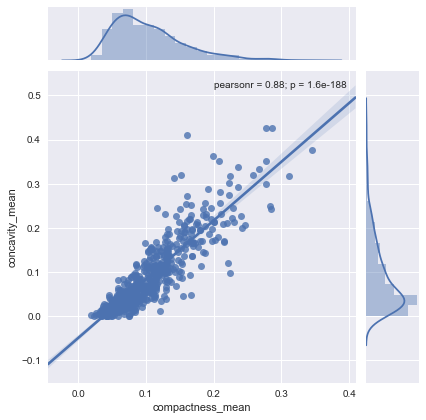

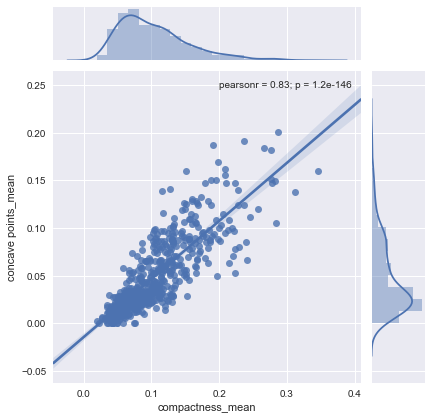

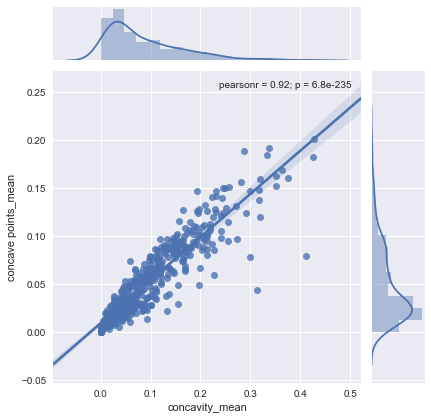

In [12]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concavity_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")


sns.jointplot(X.loc[:,'concavity_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")


### Negative Correlation

Fractal Dimention have some negative correlation with Radius, Perimeter and Area  

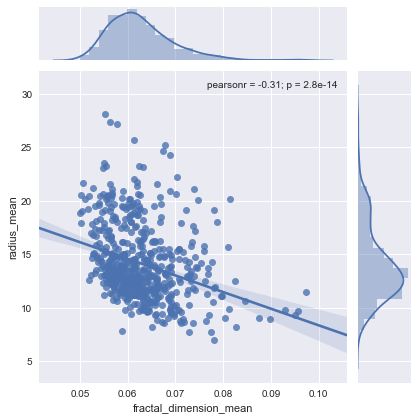

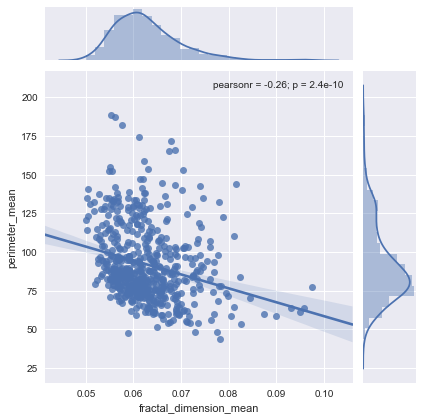

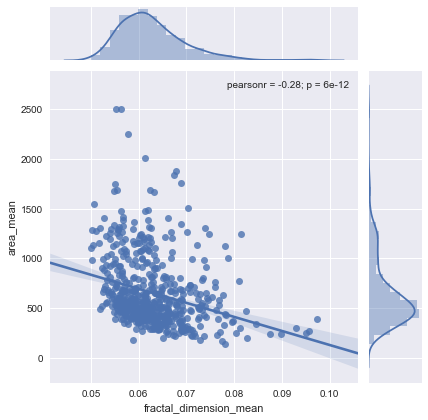

In [13]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'radius_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'area_mean'], 
              kind="regg")

### Verifing ig Dataset is Balanced

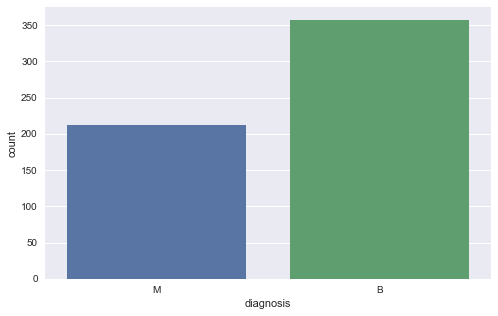

In [14]:
# Plot a countplot
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y) 

Data ins't balenced, there is more case of benigns tumors that malignant. Later we'll use methods to balance data and analyze if results get better. 

In [15]:
# Print count
count = y.value_counts()
print 'Number of Benign : ',count[0] 
print 'Number of Malignant : ',count[1] 

Number of Benign :  357
Number of Malignant :  212


### Feature Engineering

Creating a Volume Mean Feature using radius_mean

In [16]:
# Creating a empty list
mean_volume = []
# defining pi
pi = 3.1415

# calculatin mean volume for each mean radius and saving result in mean_volume list
for i in range(len(X)):
    #aving result in mean_volume list
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

# Creating a new feature
X["mean_volume"]= mean_volume    

Creating a simple new feature, measuraments_sum_mean just adding feature relatade with cell size

In [17]:
# Creating a new feature adding up some phisical measuraments
X["mesuraments_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_volume,mesuraments_sum_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,24387.612775,1141.79
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,36456.810913,1479.47
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,31975.176401,1352.69
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,6238.412850,475.10
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,34988.227503,1452.39


### Feature Scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.[1]

[Feature Scaling - Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)

In [19]:
# Define a scaler function
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(X)

scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_volume,mesuraments_sum_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.250649,0.375800
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.382391,0.509729
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.333471,0.459446
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.052540,0.111381
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.366360,0.498988


### Features Distribution

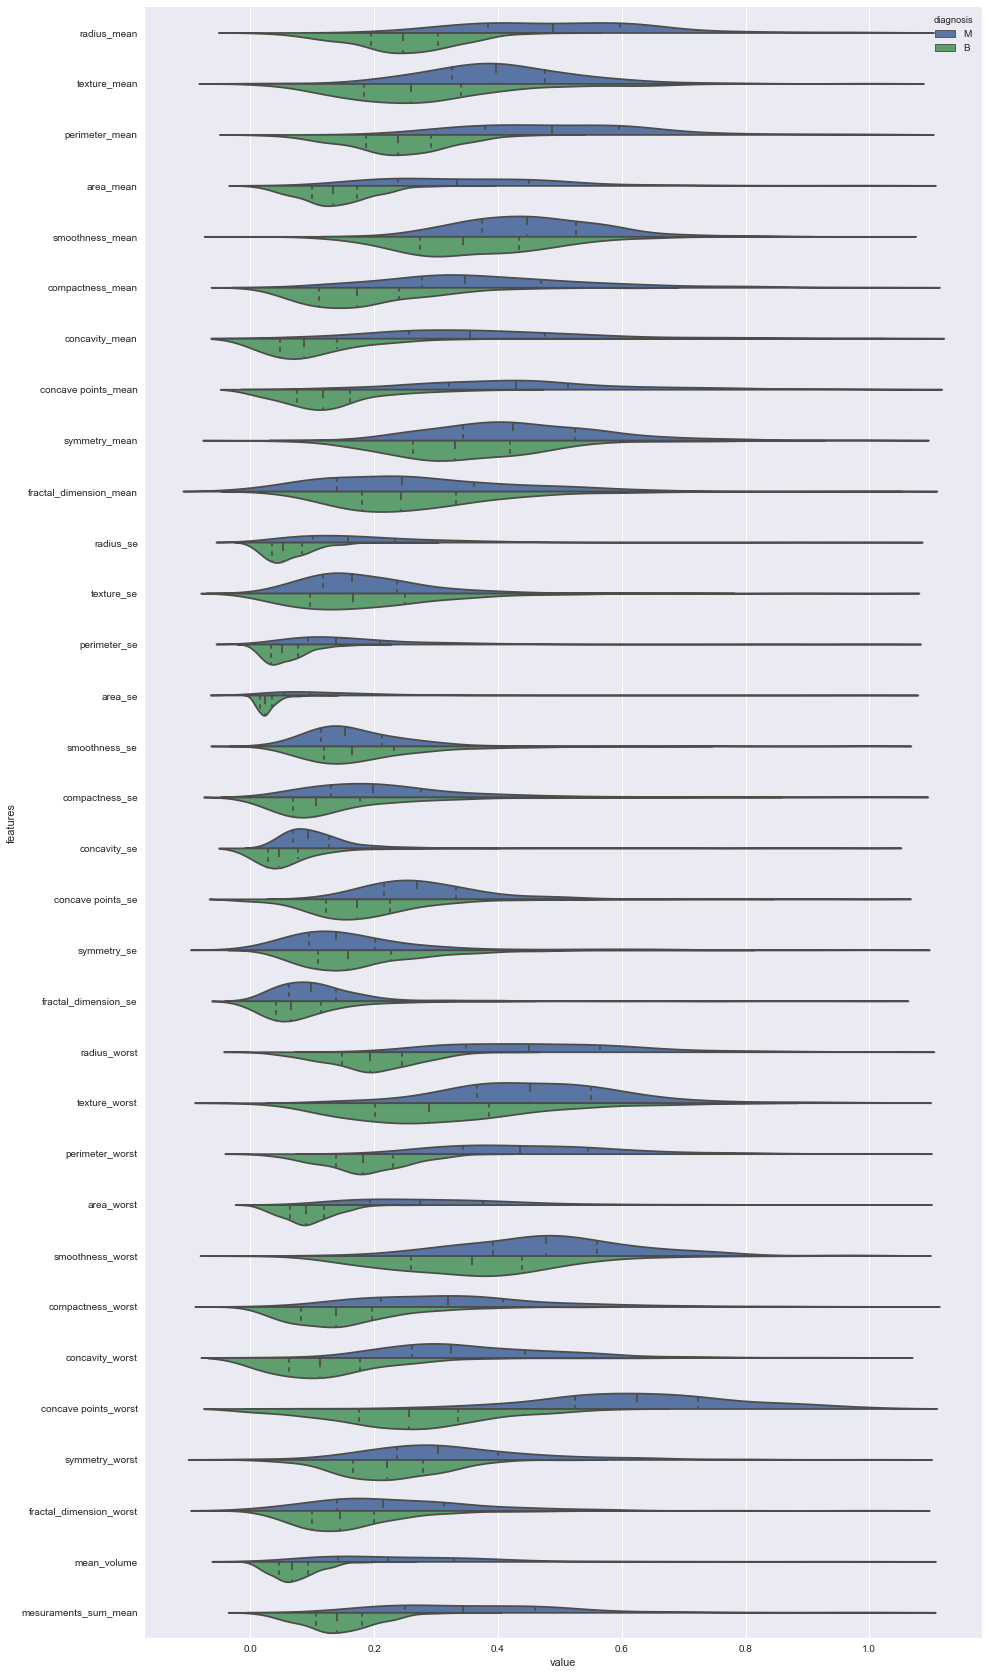

In [20]:
# Preparing data
data_plot = pd.concat([y,scaled_df],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
# Plot a violinplot
sns.set(rc={'figure.figsize':(15,30)})
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_plot,split=True, inner="quart")

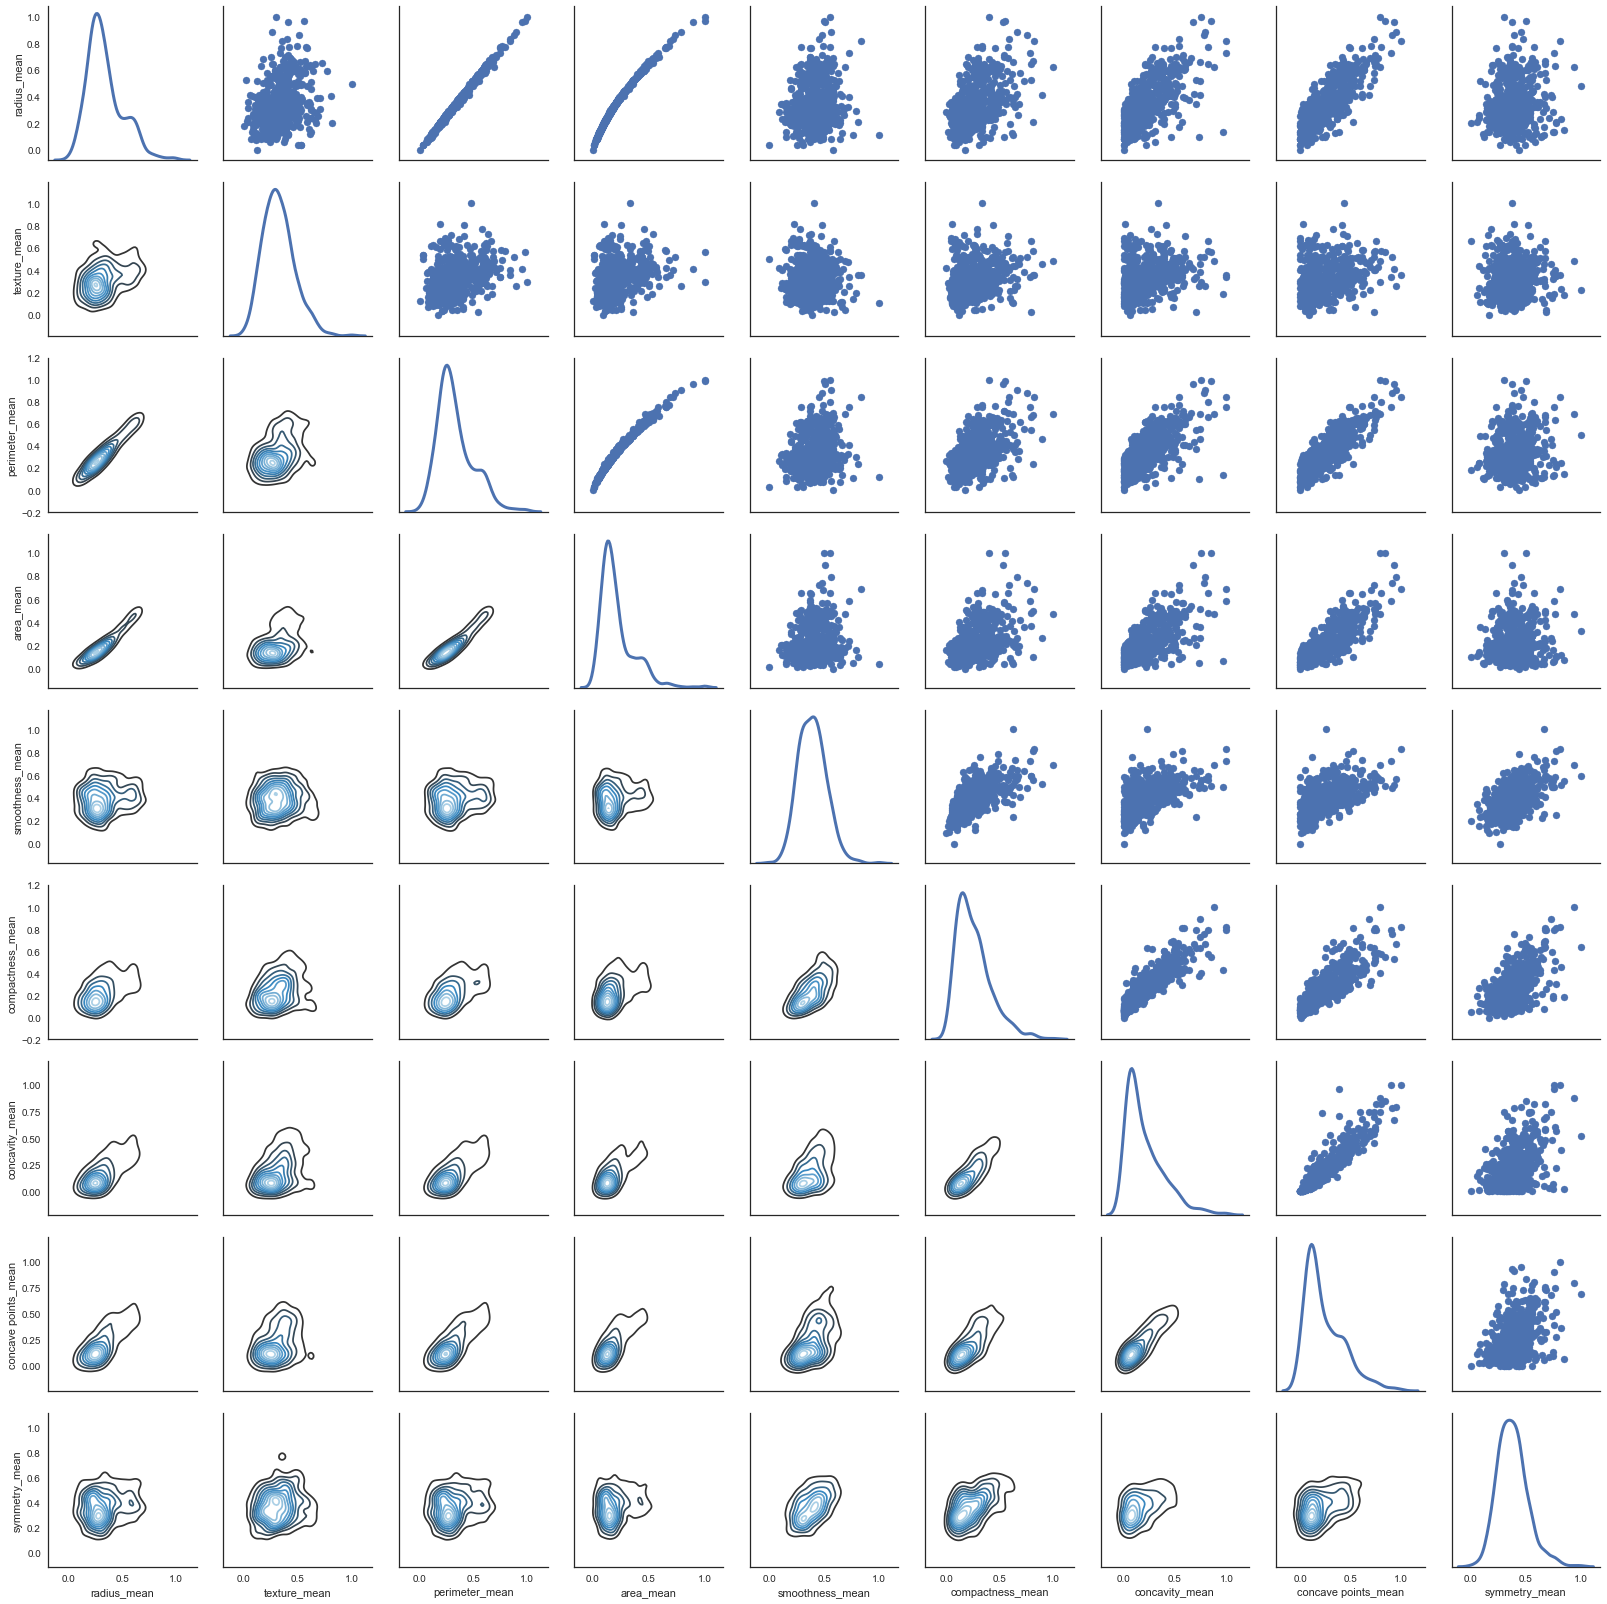

In [21]:
# Ploting a pairplot Grid
sns.set(style="white")
df = scaled_df.iloc[:,0:9]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

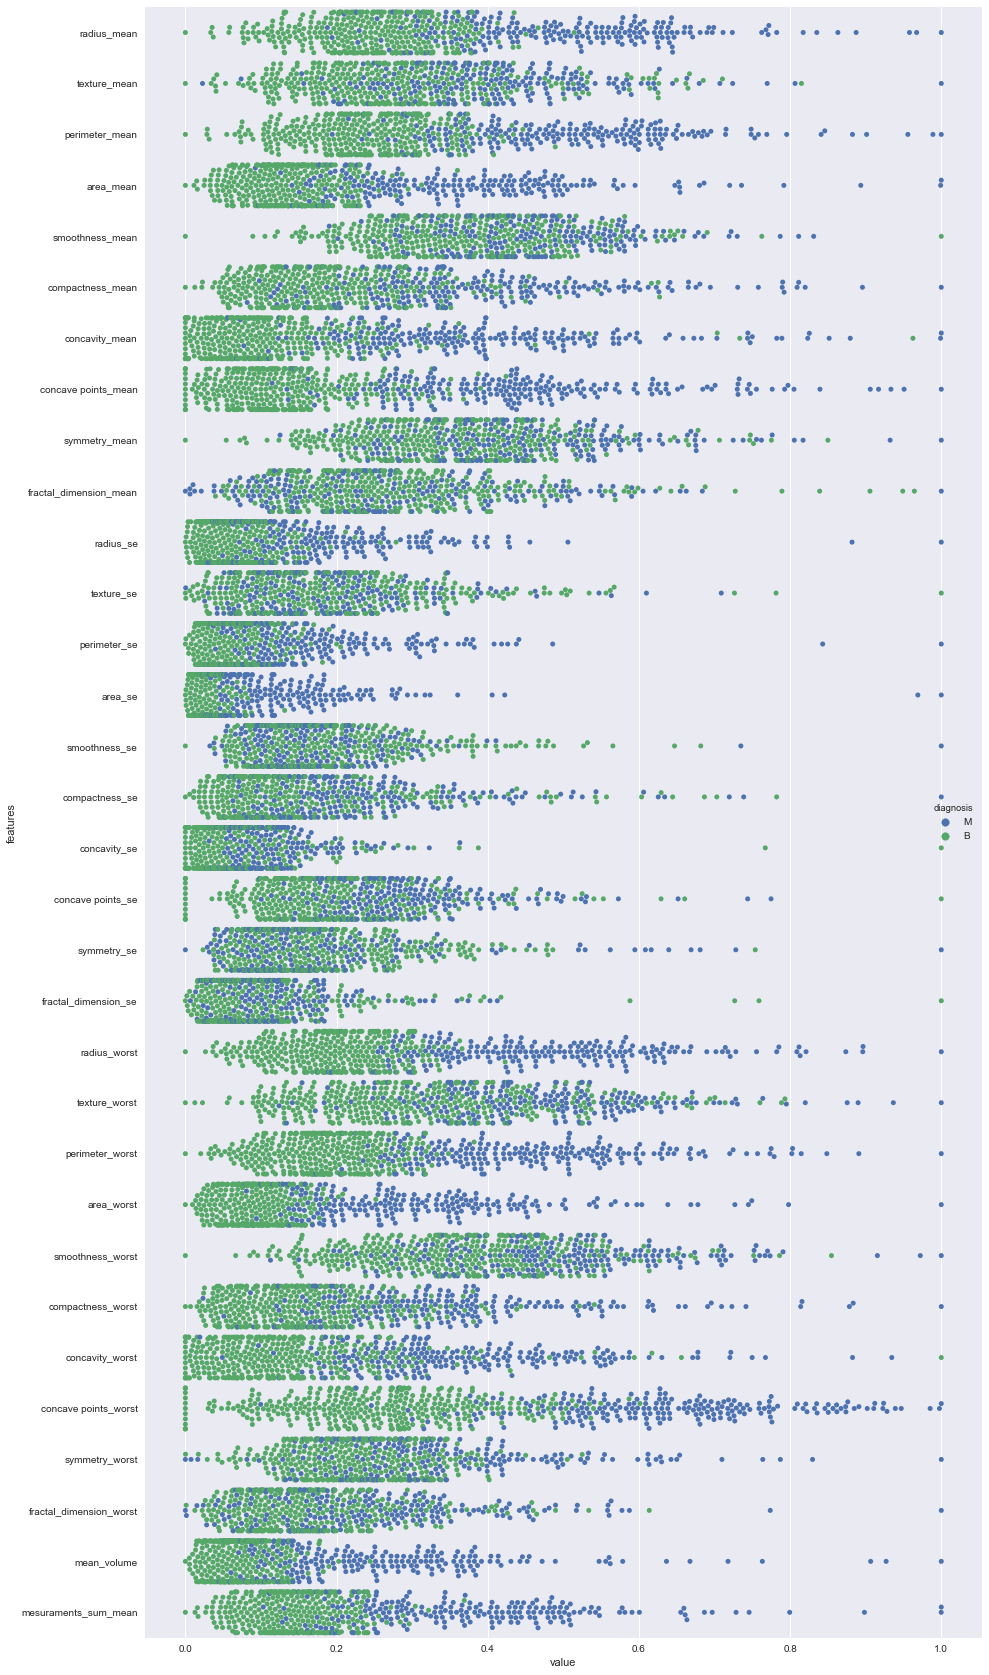

In [22]:
# Plot a Swarmplot
sns.set(style="whitegrid", palette="muted")
data_plot = scaled_df
data_plot = pd.concat([y,data_plot.iloc[:,0:]],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
#plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(15,30)})
sns.swarmplot(x="value", y="features", hue="diagnosis", data=data_plot)

### Detect Outliers using [Tukey Method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)

In [23]:
# Define a function to detect outliers
def remove_outliers(X, y, f=2, distance=1.5):
    
    """The Function receive Features (X) and Label (y) a frequency (f) and Inter-Quartile distance (distance),  
    and return features and labels without outliers (good_X, good_y)"""
    
    outliers  = []

    # For each feature find the data points with extreme high or low values
    for feature in X.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * distance

        outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)

    # Select the indices for data points you wish to remove
    flat_list = [item for sublist in outliers for item in sublist]

    # importing Counter
    from collections import Counter
    
    freq = Counter(flat_list)
    # Create a list to store outliers to remove
    outliers_to_remove = []
    
    for key, value in freq.iteritems():
        if value > f:
            outliers_to_remove.append(key)

    # Remove the outliers, if any were specified
    good_X = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
    good_y    = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)
    # Sort list
    outliers_to_remove.sort()
    # Print outliers founded
    for i in range(len(outliers_to_remove)):
        print "data point: ", outliers_to_remove[i], "is considered outlier to more than ", f, " feature"

    print "All ", len(outliers_to_remove), "were removed!"
    # return data without outliers
    return good_X, good_y 


good_X, good_y = remove_outliers(scaled_df, y, f=2, distance=1.5)

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  14 is considered outlier to more than  2  feature
data point:  15 is considered outlier to more than  2  feature
data point:  18 is considered outlier to more than  2  feature
data point:  22 is considered outlier to more than  2  feature
data point:  23 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  26 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  77 is considered outlier to more than  2  fea

In [24]:
good_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_volume,mesuraments_sum_mean
0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.382391,0.509729
1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.333471,0.459446
2,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.366360,0.498988
3,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939,0.072677,0.149860
4,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853,0.262358,0.390102


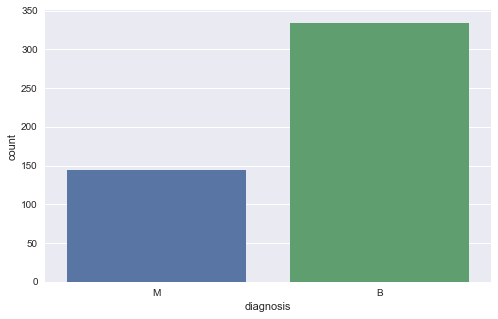

In [25]:
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(good_y) 

In [26]:
count = y.value_counts()
count2 = good_y.value_counts()

print 'Number of Benign removed: ',count[0] - count2[0] 
print 'Number of Malignant removed: ',count[1] - count2[1] 

Number of Benign removed:  23
Number of Malignant removed:  68


Many malignant were considered outilier, this make data even more unbalanced. Later we'll understand if remove outlier improve results in this Dataset.

### PCA

Cumulative explained variance:
Dimension 1    0.5066
Dimension 2    0.6731
Name: Explained Variance, dtype: float64


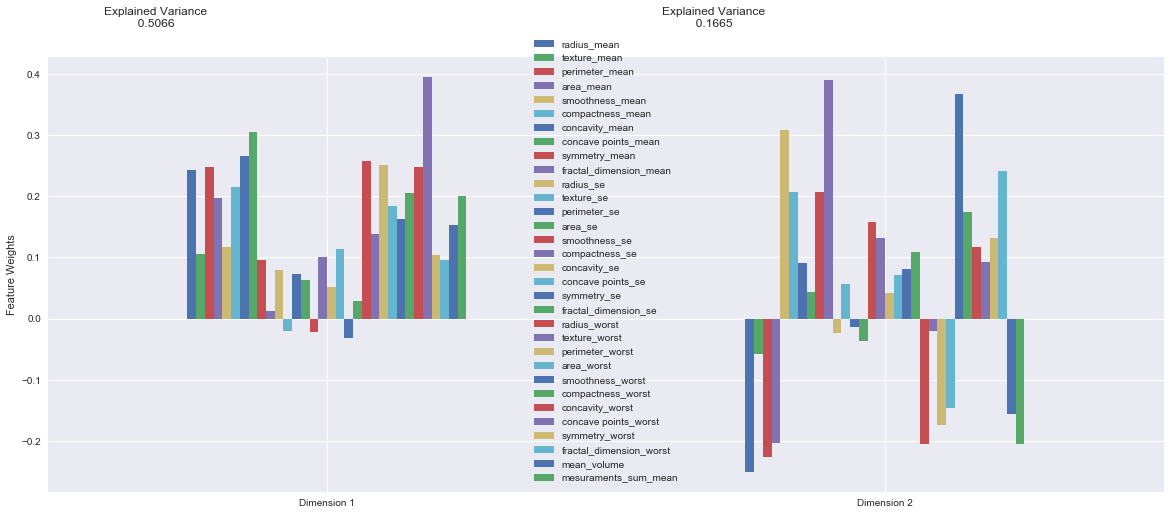

In [27]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_X)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_X)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(good_X)

# Generate PCA results plot
pca_results = vs.pca_results(good_X, pca)

print "Cumulative explained variance:"
print pca_results['Explained Variance'].cumsum()

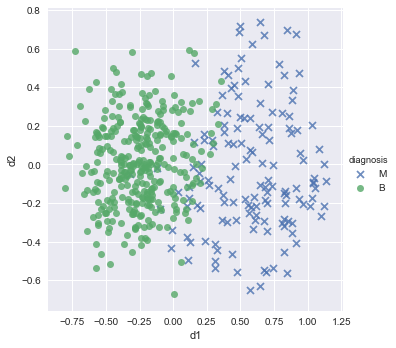

In [28]:
pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)

sns.lmplot(x="d1", y="d2", hue="diagnosis", data=data_plot,  markers=["x", "o"], fit_reg=False)

In [29]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=3)
pca.fit(good_X)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(good_X)

In [30]:
pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2", "d3"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)
data_plot.head()

,diagnosis,d1,d2,d3
0,M,0.692615,-0.558295,-0.226831
1,M,1.139650,-0.085448,-0.150366
2,M,0.812926,-0.301080,-0.399830
3,M,0.499923,0.719246,-0.187294
4,M,0.674242,-0.292226,-0.095475


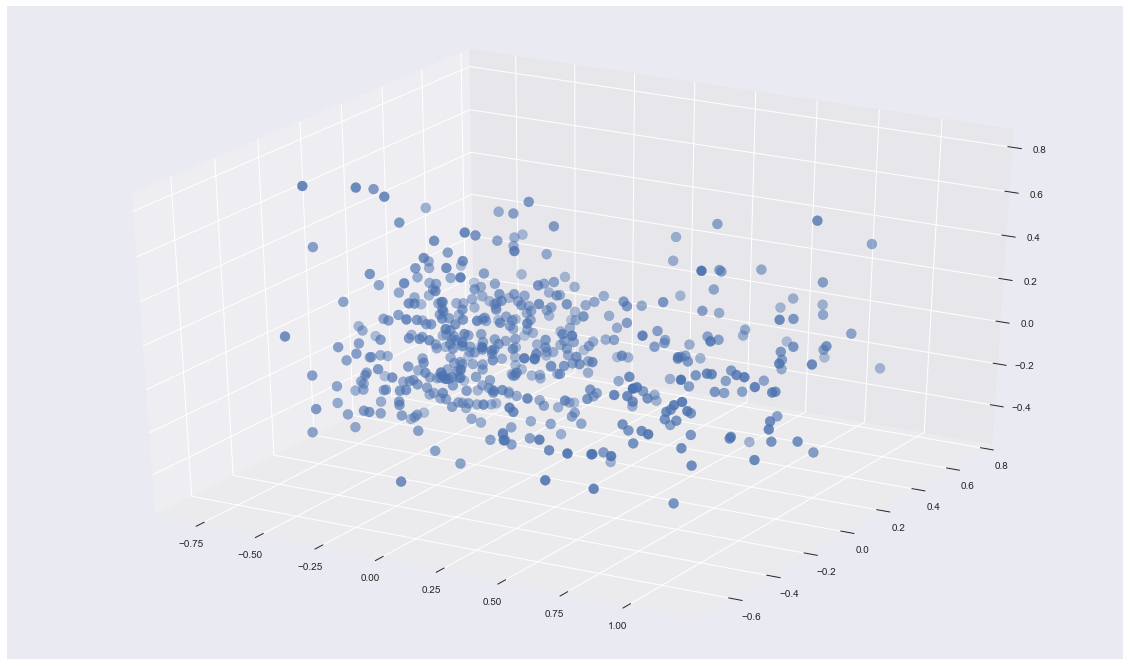

In [31]:
# plot
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_plot['d1'], data_plot['d2'], data_plot['d3'], s=100)
#ax.view_init(30, 185)
plt.show()

In [32]:
def pca(X, n_components=3):
    
    """The function receive features (X), and a target number of components (n_components),
    and return a PCA transformed with n_components dimentions"""

    pca = PCA(n_components)
    pca.fit(X)

    # TODO: Transform log_samples using the PCA fit above
    pca_samples = pca.transform(X)

    return pd.DataFrame(pca_samples)
    

pca_df = pca(X, 3)
pca_df.head()

,0,1,2
0,10258.198985,-689.651652,106.500059
1,22321.573082,-102.143913,-25.255216
2,17830.036487,-58.701094,-45.523263
3,-7959.822056,-21.079974,66.438676
4,20837.353069,195.675444,-126.343424


Runing PCA experiments I realized that is necessary many dimensions (or PCA components) to explain data variance, so I decided do not use PCA. 

## [Imbalanced Learning](http://contrib.scikit-learn.org/imbalanced-learn/stable/)

*** Naive random over-sampling***  
One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The RandomOverSampler offers such scheme:

[('B', 357), ('M', 357)]


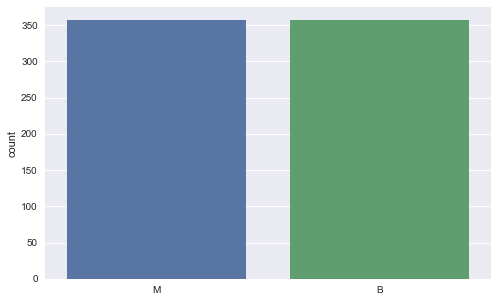

In [33]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler().fit_sample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled) 

** From random over-sampling to SMOTE and ADASYN**  

Apart from the random sampling with replacement, there is two popular methods to over-sample minority classes: (i) Synthetic Minority Oversampling Technique (SMOTE) and (ii) Adaptive Synthetic (ADASYN) sampling method. These algorithm can be used in the same manner:

[('B', 357), ('M', 357)]


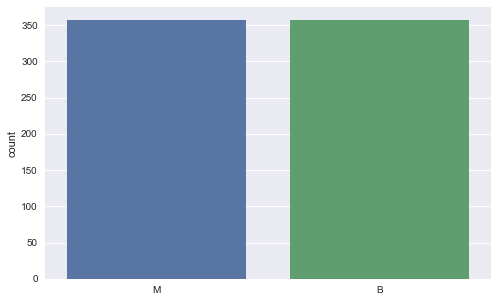

In [34]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled) 

[('B', 357), ('M', 359)]


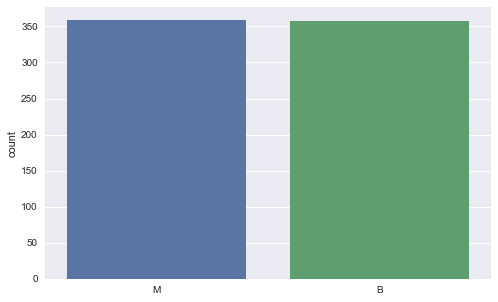

In [35]:
X_resampled, y_resampled = ADASYN().fit_sample(X, y)
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled) 

[('B', 357), ('M', 357)]


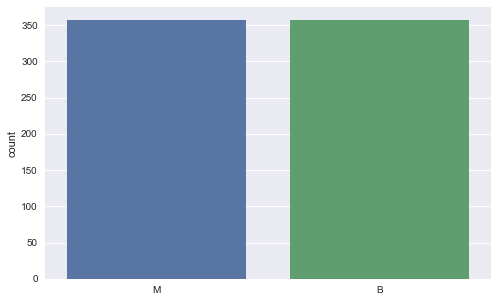

In [36]:
# Define a function to rebalance data
def resample(X,y, method="RandomOverSampler"):
    
    """The function receive features and labels (X, y) and a method to balance data
    available methods RandomOverSampler, ADASYN, SMOTE
    
    The funcion returns X_resampled, y_resampled"""
    
    if method == "RandomOverSampler":
        X_resampled, y_resampled = RandomOverSampler().fit_sample(X, y)
    if method == "ADASYN":
        X_resampled, y_resampled = ADASYN().fit_sample(X, y)
    else:
        X_resampled, y_resampled = SMOTE().fit_sample(X, y)
        
    print(sorted(Counter(y_resampled).items()))
    
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        
    return X_resampled, y_resampled


# choose between RandomOverSampler, ADASYN, SMOTE
X_resampled, y_resampled = resample(X,y, "SMOTE")

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled) 


### Feature Selection using [Scikit Learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

Feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. SelectKBest removes all but the k highest scoring features

In [37]:
def selector(X, y, k=12):
    
    """The function receive features and labels (X, y) and a target number to select features (k)
    and return a new dataset wiht k best features"""
    
    selector = SelectKBest(chi2, k)
    
    X_new = selector.fit_transform(X, y)
    
    return pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

X_new = selector(X, y, 5)

X_new.head()

,area_mean,area_se,area_worst,mean_volume,mesuraments_sum_mean
0,1001.0,153.40,2019.0,24387.612775,1141.79
1,1326.0,74.08,1956.0,36456.810913,1479.47
2,1203.0,94.03,1709.0,31975.176401,1352.69
3,386.1,27.23,567.7,6238.412850,475.10
4,1297.0,94.44,1575.0,34988.227503,1452.39


## Test, Tune and Compare Classifiers with different parameters and data settings

In [38]:
data = pd.read_csv("data.csv")

y = data["diagnosis"]
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

mean_volume = []
pi = 3.1415

for i in range(len(X)):
    
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

X["mean_volume"]= mean_volume  



X["mesuraments_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

X.shape

(569, 32)

### Importing Classifiers Algorithms and set parameters

** [Grid Search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)**

Exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [39]:
# Random Forest Classifier 
RF_clf = RandomForestClassifier()
# Parameters to tune
RF_par = {"max_depth": [3, None], "max_features": [1, 3, 10], "min_samples_split": [2, 3, 10], 
          "min_samples_leaf": [1, 3, 10], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

# Extra Trees Classifier
XT_clf = ExtraTreesClassifier()
# Parameters to tune
XT_par = { 'n_estimators': [5, 10, 16], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]}

# Decision Tree Classifier
DT_clf =DecisionTreeClassifier()
# Parameters to tune
DT_par = { 'splitter': ['best', ], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]}

# Support Vector Machine Classifier
SV_clf = svm.SVC()
# Parameters to tune
SV_par = {'kernel': ['rbf'], 'C': [1]}

# AdaBoost Classifier
AD_clf = AdaBoostClassifier()
# Parameters to tune
AD_par = {'n_estimators':[10, 20, 50, 60], 'learning_rate':[0.1, 0.5, 1.0, 1.5], 'algorithm':['SAMME.R', 'SAMME']}

# Gradient Boosting Classifier
GB_clf = GradientBoostingClassifier()
# Parameters to tune
GB_par = {'loss':['deviance', 'exponential'], 'learning_rate':[0.01, 0.1, 0.5, 1.0], 'n_estimators':[50, 100, 150], 
          "min_samples_split": [2, 3], "min_samples_leaf": [1, 3], 'max_depth':[2, 3, 5]}

# SGD Classifier
SG_clf = SGDClassifier()
# Parameters to tune
SG_par = {'loss':['hinge', 'log', 'squared_hinge', 'perceptron'], 'penalty':['l2', 'l1'], 
          'alpha':[0.00001, 0.0001, 0.001], 'epsilon':[0.01, 0.1, 0.5]}

# Logistic Regression
LR_clf = LogisticRegression()
# Parameters to tune
LR_par= {'penalty':['l1','l2'], 'C': [0.5, 1, 5, 10], 'max_iter':[50, 100, 150, 200]}

# XGB Classifier
XB_clf = XGBClassifier()
# Parameters to tune
XB_par = {'max_depth':[2, 3, 5], 'learning_rate':[0.01, 0.1, 0.5, 1], 'n_estimators':[50, 100, 150, 200], 'gamma':[0, 0.001, 0.01, 0.1]}


classifiers = [RF_clf, XT_clf, DT_clf, SV_clf, AD_clf, GB_clf, SG_clf, LR_clf, XB_clf]

classifiers_names = ['Random Forest      ', 'Extra DecisionTrees', 'Decision Tree      ',
                     'Support Vector     ', 'AdaBoost Classifier', 'Gradient Boosting  ',
                     'SGD Classifier     ', 'Logistic Regression', 'XGB Classifier     ']

parameters = [RF_par, XT_par, DT_par, SV_par, AD_par, GB_par, SG_par, LR_par, XB_par]

C:\Users\trevi\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [40]:
def tune_compare_clf(X, y, classifiers, parameters, classifiers_names):
    
    '''The function receive Data (X, y), a classifiers list, 
    a list of parameters to tune each chassifier (each one is a dictionary), 
    and a list with classifiers name. 
    
    The function split data in Train and Test data, 
    train and tune all algorithms and print results using F1 score.
    
    The function also returns a Dataframe with predictions, each row is a classifier prediction,
    and X_test and y_test.
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    

    print "\n" "Train size : ", X_train.shape, " and Train labels : ", y_train.shape, "\n"

    print "Test size: ", X_test.shape, " and Test labels : ", y_test.shape, "\n", "\n"
    
    results = []
    
    print "  ---- F1 Score  ----  ", "\n"

    for clf, par, name in itertools.izip(classifiers, parameters, classifiers_names):
        # Store results in results list
        clf_tuned = GridSearchCV(clf, par).fit(X_train, y_train)
        y_pred = clf_tuned.predict(X_test)
        results.append(y_pred)   

        print name, ": %.2f%%" % (f1_score(y_test, y_pred, average='weighted') * 100.0)

    result = pd.DataFrame.from_records(results)   
    
    return result, X_test,  y_test
    

In [41]:
result, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)


Train size :  (455, 32)  and Train labels :  (455L,) 

Test size:  (114, 32)  and Test labels :  (114L,) 


  ---- F1 Score  ----   

Random Forest       : 94.74%
Extra DecisionTrees : 98.25%
Decision Tree       : 94.71%
Support Vector      : 47.80%


C:\Users\trevi\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoost Classifier : 96.49%
Gradient Boosting   : 95.60%
SGD Classifier      : 86.47%
Logistic Regression : 96.47%
XGB Classifier      : 96.47%


#### ** Result Dataset **

Store all classifiers predictions, each column is a data point and rows is prediction of each classifiers, we can use describe() function to undestand what is more common prediction for each data point, this way we're colecting the "votes" for each data point.

In [42]:
y_pred_votes = result.describe().iloc[[2]]
y_pred_votes

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
top,B,M,M,B,B,M,M,M,M,B,...,B,B,B,M,B,B,M,B,B,M


Accuracy: 96.47%


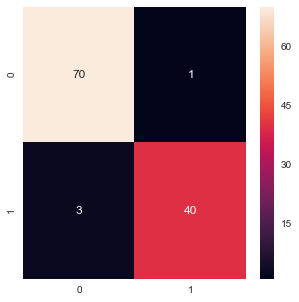

In [43]:
print("Accuracy: %.2f%%" % (f1_score(y_test, y_pred_votes.T, average='weighted') * 100.0))

sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_votes.T)
sns.heatmap(cm,annot=True,fmt="d")

### Testing Algorithms with Different Data Manipulation Techniques

Before in this project we define and test differents aproachs to use our original dataset, and create some functions:

* scaler(X)

* selector(X, y, k)

* remove_outliers(X, y, f, distance)

* resample(X, y, method)

Now we'll test using: 

* tune_compare_clf(X, y, classifiers, parameters, classifiers_names) - a function that tune each algorith to given data and print F1 Scores. 

With Technique or set of techniques is more effective for this dataset to minimize error when classifies Breast Cancer. 


In [44]:
y = data["diagnosis"]
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

mean_volume = []
pi = 3.1415

for i in range(len(X)):
    
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

X["mean_volume"]= mean_volume  
X["mesuraments_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

#### Data Original plus feature engineering [mean_volume and mesuraments_sum_mean]


In [45]:
result, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)


Train size :  (455, 32)  and Train labels :  (455L,) 

Test size:  (114, 32)  and Test labels :  (114L,) 


  ---- F1 Score  ----   

Random Forest       : 95.58%
Extra DecisionTrees : 98.25%
Decision Tree       : 94.71%
Support Vector      : 47.80%
AdaBoost Classifier : 96.49%
Gradient Boosting   : 94.74%
SGD Classifier      : 74.71%
Logistic Regression : 96.47%
XGB Classifier      : 96.47%


#### Scale

In [46]:


X_scaled = scaler(X)

result, X_test, y_test = tune_compare_clf(X_scaled, y, classifiers, parameters, classifiers_names)


Train size :  (455, 32)  and Train labels :  (455L,) 

Test size:  (114, 32)  and Test labels :  (114L,) 


  ---- F1 Score  ----   

Random Forest       : 96.47%
Extra DecisionTrees : 97.36%
Decision Tree       : 93.84%
Support Vector      : 96.45%
AdaBoost Classifier : 96.49%
Gradient Boosting   : 96.47%
SGD Classifier      : 97.36%
Logistic Regression : 97.36%
XGB Classifier      : 96.47%


#### Outiliers

In [47]:


X_good, y_good = remove_outliers(X, y, f=2, distance=2)

result, X_test, y_test = tune_compare_clf(X_good, y_good, classifiers, parameters, classifiers_names)

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  feature
data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  112 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  138 is considered outlier to more than  2  feature
data point:  146 is considered outlier to more than  2

#### Feature Selection (12 features)

In [48]:


X_selected = selector(X, y, k=12)

result, X_test, y_test = tune_compare_clf(X_selected, y, classifiers, parameters, classifiers_names)


Train size :  (455, 12)  and Train labels :  (455L,) 

Test size:  (114, 12)  and Test labels :  (114L,) 


  ---- F1 Score  ----   

Random Forest       : 95.60%
Extra DecisionTrees : 95.58%
Decision Tree       : 94.74%
Support Vector      : 47.80%
AdaBoost Classifier : 95.60%
Gradient Boosting   : 94.68%
SGD Classifier      : 49.78%
Logistic Regression : 95.58%
XGB Classifier      : 96.49%


#### Feature Selection (10 Features)

In [49]:


X_selected = selector(X, y, 10)

result, X_test, y_test = tune_compare_clf(X_selected, y, classifiers, parameters, classifiers_names)


Train size :  (455, 10)  and Train labels :  (455L,) 

Test size:  (114, 10)  and Test labels :  (114L,) 


  ---- F1 Score  ----   

Random Forest       : 97.36%
Extra DecisionTrees : 94.71%
Decision Tree       : 94.74%
Support Vector      : 47.80%
AdaBoost Classifier : 93.84%
Gradient Boosting   : 96.49%
SGD Classifier      : 80.88%
Logistic Regression : 98.24%
XGB Classifier      : 94.74%


#### Resample Method 1

In [50]:


X_new, y_new = resample(X, y, method="RandomOverSampler")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

[('B', 357), ('M', 357)]

Train size :  (571, 32)  and Train labels :  (571L,) 

Test size:  (143, 32)  and Test labels :  (143L,) 


  ---- F1 Score  ----   

Random Forest       : 97.90%
Extra DecisionTrees : 97.20%
Decision Tree       : 96.50%
Support Vector      : 37.32%
AdaBoost Classifier : 98.60%
Gradient Boosting   : 97.20%
SGD Classifier      : 35.89%
Logistic Regression : 98.60%
XGB Classifier      : 97.20%


#### Resample Method 2

In [51]:


X_new, y_new = resample(X, y, method="SMOTE")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

[('B', 357), ('M', 357)]

Train size :  (571, 32)  and Train labels :  (571L,) 

Test size:  (143, 32)  and Test labels :  (143L,) 


  ---- F1 Score  ----   

Random Forest       : 95.80%
Extra DecisionTrees : 93.71%
Decision Tree       : 90.91%
Support Vector      : 37.32%
AdaBoost Classifier : 96.50%
Gradient Boosting   : 96.50%
SGD Classifier      : 66.53%
Logistic Regression : 97.20%
XGB Classifier      : 96.50%


#### Resample Method 3

In [52]:


X_new, y_new = resample(X, y, method="ADASYN")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

[('B', 357), ('M', 359)]

Train size :  (572, 32)  and Train labels :  (572L,) 

Test size:  (144, 32)  and Test labels :  (144L,) 


  ---- F1 Score  ----   

Random Forest       : 95.83%
Extra DecisionTrees : 95.83%
Decision Tree       : 90.97%
Support Vector      : 40.43%
AdaBoost Classifier : 94.44%
Gradient Boosting   : 96.53%
SGD Classifier      : 75.67%
Logistic Regression : 98.61%
XGB Classifier      : 94.44%


#### Scale and Outiliers Remove

In [53]:


X_scaled = scaler(X)
X_good, y_good = remove_outliers(X_scaled, y, f=2, distance=2)

result, X_test, y_test = tune_compare_clf(X_good, y_good, classifiers, parameters, classifiers_names)

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  feature
data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  112 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  138 is considered outlier to more than  2  feature
data point:  146 is considered outlier to more than  2

#### Scale and Resample

In [54]:


X_scaled = scaler(X)
X_new, y_new = resample(X_scaled, y, method="RandomOverSampler")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

[('B', 357), ('M', 357)]

Train size :  (571, 32)  and Train labels :  (571L,) 

Test size:  (143, 32)  and Test labels :  (143L,) 


  ---- F1 Score  ----   

Random Forest       : 95.81%
Extra DecisionTrees : 97.20%
Decision Tree       : 91.61%
Support Vector      : 93.00%
AdaBoost Classifier : 98.60%
Gradient Boosting   : 96.50%
SGD Classifier      : 97.20%
Logistic Regression : 95.81%
XGB Classifier      : 97.20%


#### Scale, Outliers Remove and Resample

In [55]:

    
X_scaled = scaler(X)
X_good, y_good = remove_outliers(X_scaled, y, f=2, distance=2)
X_new, y_new = resample(X_good, y_good, method="RandomOverSampler")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  feature
data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  112 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  138 is considered outlier to more than  2  feature
data point:  146 is considered outlier to more than  2

#### Feature Selection, Scale, Outlier Remove and Resample

In [56]:



X_selected = selector(X, y, 10)
X_scaled = scaler(X_selected)
X_good, y_good = remove_outliers(X_scaled, y, f=2, distance=2)
X_new, y_new = resample(X_good, y_good, method="RandomOverSampler")


result, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)

data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  164 is considered outlier to more than  2  feature
data point:  180 is considered outlier to more than  2  feature
data point:  202 is considered outlier to more than  2  feature
data point:  210 is considered outlier to more than  2  feature
data point:  212 is considered outlier to more than  2  feature
data point:  236 is considered outlier to more than  2  feature
data point:  265 is considered outlier to more than  2  feature
data point:  272 is considered outlier to more than  2  feature
data point:  339 is considered outlier to more than  2  feature
data point:  352 is considered outlier to more than  2  feature
data point:  368 is considered outlier to more than  2  feature
data point:  369 is considered outlier to more than  2  feature
data point:  461 is considered outlier to

### Results with techniques alone

|Classifier          |Original  | Scaled   | Outiliers Removed | 12 Features | 10 Features | Resampled Randon | SMOTE      |      ADASYN |
|--------------------|----------|----------|-------------------|-------------|-------------|------------------|------------|-------------|
|Random Forest       | 95.60%   |96.47%    |94.23%             |94.68%       |95.58%       |96.50%            |96.50%      |96.52%       |
|Extra DecisionTrees | 96.47%   |95.60%    |96.14%             |96.47%       |**98.24%**   |**99.30%**        |97.90%      |95.83%       |
|Decision Tree       | 94.74%   |94.74%    |93.22%             |95.58%       |94.74%       |97.20%            |93.70%      |94.44%       |
|Support Vector      | 47.80%   |96.45%    |50.05%             |47.80%       |47.80%       |37.32%            |37.32%      |44.34%       |
|AdaBoost Classifier |**96.49%**|96.49%    |96.12%             |95.60%       |94.71%       |97.90%            |96.50%      |95.83%       |
|Gradient Boosting   | 94.74%   |94.74%    |94.21%             |92.95%       |95.60%       |96.50%            |96.50%      |96.52%       |
|SGD Classifier      | 87.42%   |**97.36%**|90.16%             |76.39%       |24.34%       |73.29%            |61.44%      |74.61%       |
|Logistic Regression | 96.47%   |**97.36%**|**98.06%**         |95.58%       |97.35%       |98.60%            |**98.60%**  |**97.92%**   |
|XGB Classifier      | 96.47%   |96.47%    |96.16%             |**96.49%**   |94.74%       |95.80%            |95.80%      |95.83%       |


### Results with set of techniques




|Classifier          | Scaled + Outiliers Removed | Scaled + Resampled | Scaled + Outiliers Removed+Resampled | Scaled + Feature + Out. Rem + Resampled |
|--------------------|----------------------------|--------------------|--------------------------------------|-----------------------------------------|
|Random Forest       |96.14%                      |**97.90%**          |97.83%                                |96.47%                                   |
|Extra DecisionTrees |94.21%                      |96.50%              |97.10%                                |96.47%                                   |
|Decision Tree       |91.24%                      |97.20%              |94.20%                                |94.74%                                   |
|Support Vector      |**98.05%**                  |95.81%              |97.83%                                |47.80%                                   |
|AdaBoost Classifier |96.14%                      |95.11%              |97.10%                                |**96.49%**                               |
|Gradient Boosting   |95.20%                      |96.50%              |**99.28%**                            |95.60%                                   |
|SGD Classifier      |**98.05%**                  |93.68%              |97.83%                                |85.07%                                   |
|Logistic Regression |97.08%                      |95.80%              |97.83%                                |96.47%                                   |
|XGB Classifier      |96.16%                      |97.20%              |98.55%                                |96.47%                                   |



The highest and more consistents results across all classifiers was achieved using Scale, Removing Outiliers and Balancing data. The higher score was reached by Gradient Boosting Algorithm (F1 Score = 99.28) and lower was Decision Tree (F1 Score 94,20) which even been the lower is a very descent result. 

### Plotting a [Confusion Matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) with best results



In [57]:
# Scale, Outliers Remove and Resample
    
X_scaled = scaler(X)
X_good, y_good = remove_outliers(X_scaled, y, f=2, distance=2)
X_new, y_new = resample(X_good, y_good, method="RandomOverSampler")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  feature
data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  112 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  138 is considered outlier to more than  2  feature
data point:  146 is considered outlier to more than  2

In [58]:
y_pred_votes = result.describe().iloc[[2]]

Accuracy: 99.28%


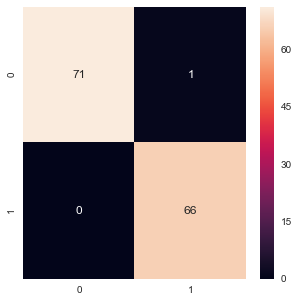

In [59]:
print("Accuracy: %.2f%%" % (f1_score(y_test, y_pred_votes.T, average='weighted') * 100.0))

sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_votes.T)
sns.heatmap(cm,annot=True,fmt="d")

# Results

![F1 Score](conf_mat.png)

- 71 data points was correctly predicted as Benign tumors  
- 65 data points was correctly predicted as Malignant tumors  
- 01 data point was wrongly predicted as Malignan tumor  
- 01 data point was wrongly predictes as Benign tumor  

Using [F1 Score](https://en.wikipedia.org/wiki/F1_score) formula:

![F1 Score](f12.jpg)

In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall), where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

#### F1 Score = 0.9855
